In [2]:
import os
os.chdir('/home/seidi/Repositories/mestrado_final/')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

# Overall performances
Stratifying the complete metadataset by each dataset.

In [3]:
scores = pd.read_csv('data/results/overall_performance/scores.csv')
predictions = pd.read_csv('data/results/overall_performance/predictions.csv')

scores.drop('base', axis=1)

,r2,rmse,target
0,0.998626,0.010191,Recall
1,0.999195,0.045651,QueryTime
2,1.000000,0.000387,IndexTime
3,0.999585,0.040762,DistComp


# ADBIS approahces using the interpoalted Dataset
- GMM: generic meta-model
- TMM-GS: tuned meta-model with grid search
- TMM-S: tuend meta-model with subsets

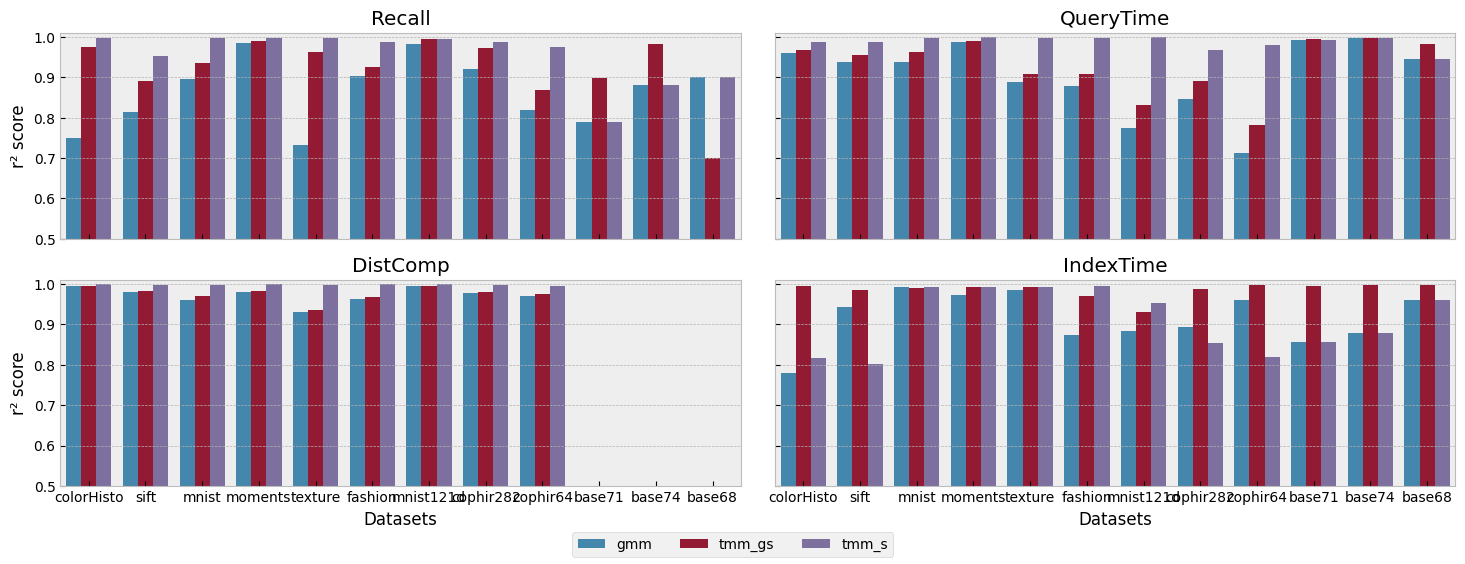

In [3]:
# 'adbis interpolated' = ad2
ad2_scores = pd.read_csv('data/results/info_sys_interpolated/adbis/scores.csv')
ad2_scores.drop_duplicates(['base', 'target', 'approach'], inplace=True)
hue_order = ['gmm', 'tmm_gs', 'tmm_s']

# ad2_scores.approach.unique()
fig, axes = plt.subplots(2,2,figsize=(18,6), dpi=100, sharex=True, sharey=True)
plt.ylim(0.5, 1.01)
axes = iter(axes.reshape(-1))
l_gambeta = []
for target in ad2_scores.target.unique():
    ax = next(axes)
    l_gambeta.append(ax)
    sns.barplot(x='base', y='r2', hue='approach', hue_order=hue_order, data=ad2_scores[ad2_scores.target == target], ax=ax)
    ax.set_title(target)
    ax.get_legend().remove()

l_gambeta = np.array(l_gambeta).reshape(2,2)
plt.setp(l_gambeta[-1, :], xlabel='Datasets')
plt.setp(l_gambeta[:, 0], ylabel='r² score')
plt.setp(l_gambeta[:-1, :], xlabel='')
plt.setp(l_gambeta[:, 1:], ylabel='')

plt.subplots_adjust(wspace=0.05, hspace=0.2)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)

### Elapsed time for recommendation. The following plot includes only the training time, it is necessary to include the tuning time, i.e. the index and query time.

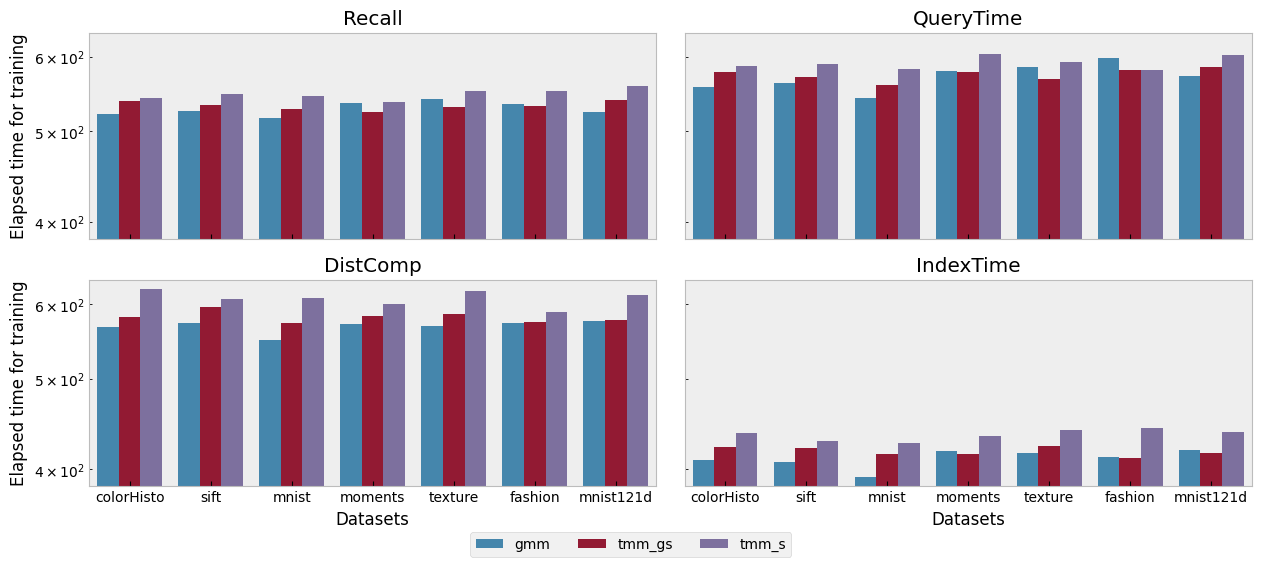

In [5]:
fig, axes = plt.subplots(2,2,figsize=(15,6), dpi=100, sharex=True, sharey=True)
plt.yscale('log')
axes = iter(axes.reshape(-1))
l_gambeta = []
for target in ad2_scores.target.unique():
    ax = next(axes)
    l_gambeta.append(ax)
    sns.barplot(x='base', y='elapsed_training', hue='approach', hue_order=hue_order, data=ad2_scores[ad2_scores.target == target], ax=ax)
    ax.set_title(target)
    ax.get_legend().remove()

l_gambeta = np.array(l_gambeta).reshape(2,2)
plt.setp(l_gambeta[-1, :], xlabel='Datasets')
plt.setp(l_gambeta[:, 0], ylabel='Elapsed time for training')
plt.setp(l_gambeta[:-1, :], xlabel='')
plt.setp(l_gambeta[:, 1:], ylabel='')

plt.subplots_adjust(wspace=0.05, hspace=0.2)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)

# Tuning the clustering approach
- GMM+: original clustering approach
- TMM-GS+: clustering with GS
- TMM-S+: clustering with subsets

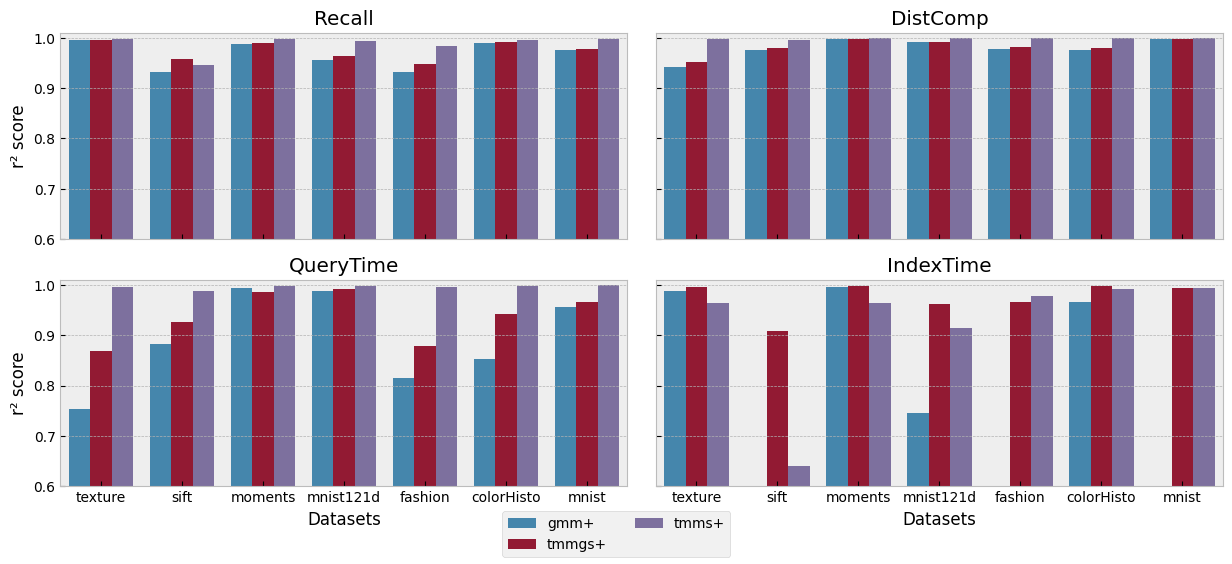

In [6]:
clus_scores = pd.read_csv('data/results/clustering_tuned/scores.csv')
clus_scores = clus_scores.rename(columns={'method': 'approach'})
clus_scores.base = clus_scores.base.apply(lambda x: x.split('_')[0])
clus_scores.approach = clus_scores.approach.apply(lambda x: x + '+')
clus_scores.drop_duplicates(['base', 'target', 'approach'], inplace=True)
hue_order = ['gmm+', 'tmmgs+', 'tmms+']

# clus_scores.approach.unique()
fig, axes = plt.subplots(2,2,figsize=(15,6), dpi=100, sharex=True, sharey=True)
plt.ylim(0.6, 1.01)
axes = iter(axes.reshape(-1))
l_gambeta = []
for target in clus_scores.target.unique():
    ax = next(axes)
    l_gambeta.append(ax)
    sns.barplot(x='base', y='r2', hue='approach', hue_order=hue_order, data=clus_scores[clus_scores.target == target], ax=ax)
    ax.set_title(target)
    ax.get_legend().remove()

l_gambeta = np.array(l_gambeta).reshape(2,2)
plt.setp(l_gambeta[-1, :], xlabel='Datasets')
plt.setp(l_gambeta[:, 0], ylabel='r² score')
plt.setp(l_gambeta[:-1, :], xlabel='')
plt.setp(l_gambeta[:, 1:], ylabel='')

plt.subplots_adjust(wspace=0.05, hspace=0.2)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)

In [7]:
clus_scores.groupby(['target', 'approach']).r2.mean()

target     approach
DistComp   gmm+        0.980454
           tmmgs+      0.983420
           tmms+       0.999077
IndexTime  gmm+       -0.258917
           tmmgs+      0.975019
           tmms+       0.921113
QueryTime  gmm+        0.891731
           tmmgs+      0.936995
           tmms+       0.996568
Recall     gmm+        0.967194
           tmmgs+      0.975143
           tmms+       0.987388
Name: r2, dtype: float64

<AxesSubplot:xlabel='target', ylabel='r2'>

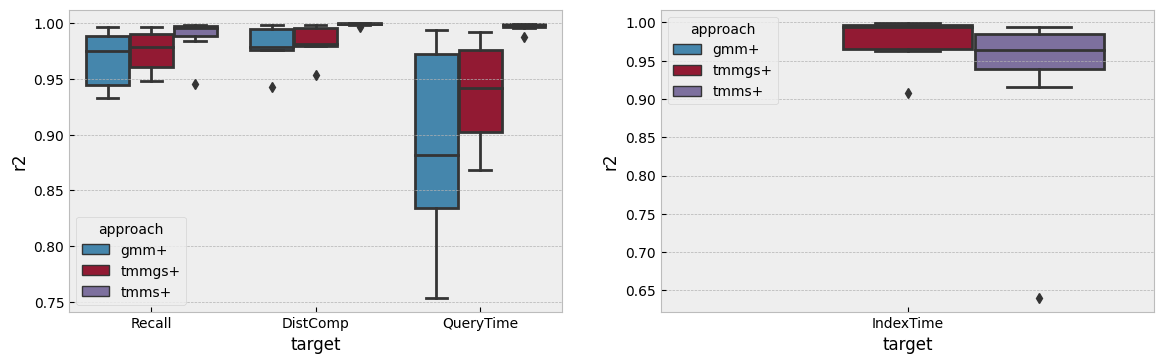

In [8]:
fig, axes = plt.subplots(1,2, dpi=100, figsize=(14,4))
sns.boxplot(x='target', y='r2', hue='approach', hue_order=hue_order, data=clus_scores[clus_scores.target != 'IndexTime'], ax=axes[0])
sns.boxplot(x='target', y='r2', hue='approach', hue_order=hue_order, data=clus_scores[(clus_scores.target == 'IndexTime') & (clus_scores.approach != 'gmm+')], ax=axes[1])

In [9]:
cols = ['approach', 'base', 'r2', 'target']

final_df = pd.concat([ad2_scores[cols], clus_scores[cols]])
final_df.approach = final_df.approach.apply(lambda x: x.replace('_', ''))
final_df.head()

,approach,base,r2,target
0,gmm,colorHisto,0.711575,Recall
1,gmm,colorHisto,0.967377,QueryTime
2,gmm,colorHisto,0.990407,DistComp
3,gmm,colorHisto,0.831010,IndexTime
4,gmm,sift,0.680966,Recall


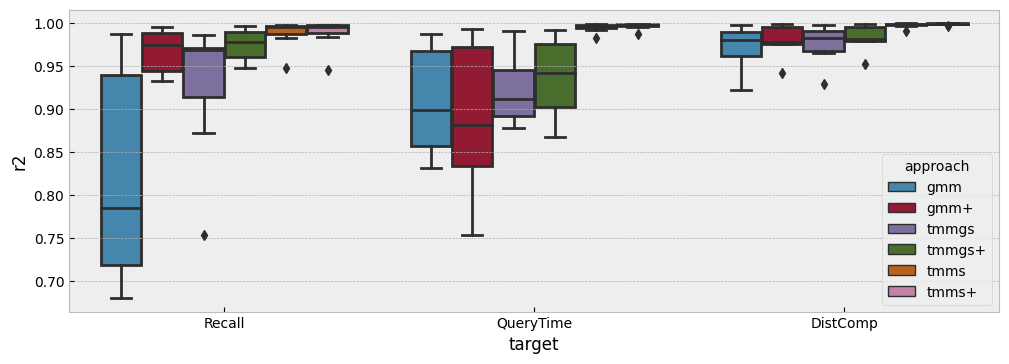

In [17]:
hue_order = ['gmm', 'gmm+', 'tmmgs', 'tmmgs+', 'tmms', 'tmms+']
plt.figure(figsize=(12, 4), dpi=100)
sns.boxplot(x='target', y='r2', hue='approach', hue_order=hue_order, data=final_df[final_df.target != 'IndexTime'])
# final_df.to_csv('src/notebooks/dissertation/all_methods.csv', index=False)

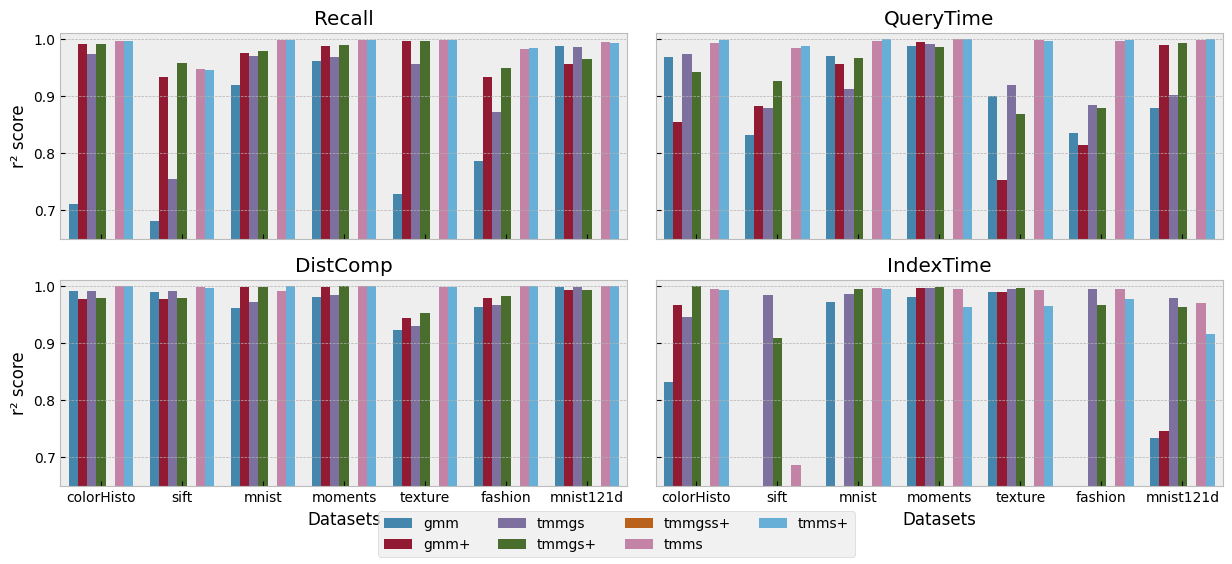

In [11]:
hue_order = ['gmm', 'gmm+', 'tmmgs', 'tmmgs+', 'tmmgss+', 'tmms', 'tmms+']
# final_df.approach.unique()
fig, axes = plt.subplots(2,2,figsize=(15,6), dpi=100, sharex=True, sharey=True)
plt.ylim(0.65, 1.01)
axes = iter(axes.reshape(-1))
l_gambeta = []
for target in final_df.target.unique():
    ax = next(axes)
    l_gambeta.append(ax)
    sns.barplot(x='base', y='r2', hue='approach', hue_order=hue_order, data=final_df[final_df.target == target], ax=ax)
    ax.set_title(target)
    ax.get_legend().remove()

l_gambeta = np.array(l_gambeta).reshape(2,2)
plt.setp(l_gambeta[-1, :], xlabel='Datasets')
plt.setp(l_gambeta[:, 0], ylabel='r² score')
plt.setp(l_gambeta[:-1, :], xlabel='')
plt.setp(l_gambeta[:, 1:], ylabel='')

plt.subplots_adjust(wspace=0.05, hspace=0.2)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)

# Recommendation time
- GS
    - Index time
    - Query time
- GMM
    - Training phase
    - Inference
- TMM-GS
    - GS steps on target dataset
    - Plus GMM steps
- TMM-S
    - Running batches of experiments on subsets
    - Plus GMM steps


In [4]:
import utils
mb = utils.read_int_mb()
mb.loc[:, ['IndexTime', 'QueryTime']] = mb.loc[:, ['IndexTime', 'QueryTime']].apply(np.exp)
mb.head()

,IndexParams,QueryTimeParams,QueryTime,graph_type,k_searching,nr_inst,attr_ent.mean,attr_ent.sd,attr_to_inst,cov.mean,...,lid_mean,lid_std,lid_kurtosis,lid_skew,lid_entropy,lid_hist0,lid_hist1,Recall,IndexTime,DistComp
base,,,,,,,,,,,,,,,,,,,,,
base1_4000,40.0,4.0,0.056003,2.0,10.0,8.294050,3.906888,0.000000e+00,0.002000,0.011918,...,7.894923,0.978135,1.343097,0.898480,4.597705,0.0100,0.0800,0.874462,0.171028,6.622607
base11_8000,10.0,80.0,0.114297,1.0,10.0,8.987197,4.247927,1.514460e-07,0.001000,10.158421,...,7.400416,0.988877,-0.465294,0.313205,4.596302,0.0400,0.0700,0.695343,0.120801,8.358937
mnist_32000,40.0,10.0,1.541006,0.0,10.0,10.373491,1.081899,1.256680e+00,0.024500,253.271749,...,14.133920,5.558333,5.238241,1.676837,9.140893,0.1259,0.4643,0.983178,15.526792,8.667132
base20_9900,65.0,9.0,0.134504,2.0,5.0,9.200290,4.392317,0.000000e+00,0.000808,3.347395,...,7.667151,0.849128,-0.272782,0.343715,4.599083,0.0100,0.0700,0.986000,0.970387,7.963497
mnist121d_64000,5.0,3.0,0.034723,2.0,10.0,11.066638,2.192189,1.987236e+00,0.001891,192.596833,...,10.607696,3.396075,3.108886,1.216505,9.162204,0.1207,0.4192,0.025171,136.462000,4.227881


## Total time = Index Time + Query Time + Meta-Models for each Meta-target Sum?
- If yes, check if the Index Time will be included

In [12]:
import numpy as np
import pandas as pd

import utils
mb = utils.read_int_mb()
mb.IndexTime = mb.IndexTime.apply(np.exp)
ad2_scores = pd.read_csv('data/results/info_sys_interpolated/adbis/scores.csv')
ad2_scores = ad2_scores[ad2_scores.k_searching == 30]
# ad2_scores = pd.read_csv('data/results/adbis_interpolated/scores.csv')
clus_scores = pd.read_csv('data/results/info_sys_interpolated/clustering_tuned/scores.csv')
clus_scores = clus_scores.rename(columns={'method': 'approach'})
clus_scores.approach = clus_scores.approach + '+'
clus_scores = clus_scores[clus_scores.k_searching == 30]
nn = [5., 25., 70., 150.]
rr = [1., 10., 40., 120.]
REAL_BASES = [
    'texture_67940', 'sift_999900', 'moments_67940',
    'mnist121d_69900', 'fashion_69900',
    'colorHisto_67940', 'mnist_69900',
    'base71_999900', 'cophir64_999900', 'cophir282_999900'
]

cols = ['base', 'approach', 'ix_time', 'qt_time', 'total_time', 'tt_recall', 'rt_recall', 'tt_querytime', 'rt_querytime', 'tt_indextime', 'rt_indextime', 'tt_distcomp', 'rt_distcomp']
recommendation_time = pd.DataFrame(columns=cols)

# GS TIME
for b in REAL_BASES:
    tmp = mb[
        (mb.index == b) &
        (mb.IndexParams.isin(nn)) &
        (mb.QueryTimeParams.isin(rr))
    ]

    # b = b.split('_')[0]
    ix_time = tmp.IndexTime.sum()
    qt_time = tmp.QueryTime.sum()
    total_time = ix_time + qt_time
    new = pd.DataFrame([[b, 'gs', ix_time, qt_time, total_time, 0, 0, 0, 0, 0, 0, 0, 0]], columns=cols)
    recommendation_time = recommendation_time.append(new)

# TMM-GS TIME
for b in REAL_BASES:
    # b = b.split('_')[0]
    tmp = ad2_scores[(ad2_scores.base == b) & (ad2_scores.approach=='tmm_gs')]
    tmp_gs = recommendation_time[(recommendation_time.approach == 'gs') & (recommendation_time.base == b)]
    assert len(tmp_gs) == 1
    new = pd.DataFrame({
        'base': [b],
        'approach': ['tmmgs'],
        'ix_time': tmp_gs.ix_time.values,
        'qt_time': tmp_gs.qt_time.values,
        'total_time': [tmp.elapsed_training.sum() + tmp.elapsed_inference.sum() + tmp_gs.ix_time.values.sum() + tmp_gs.qt_time.values.sum()],
        'tt_recall': tmp[tmp.target=='Recall'].elapsed_training.values,
        'rt_recall': tmp[tmp.target=='Recall'].elapsed_inference.values,
        'tt_querytime': tmp[tmp.target=='QueryTime'].elapsed_training.values,
        'rt_querytime': tmp[tmp.target=='QueryTime'].elapsed_inference.values,
        'tt_indextime': tmp[tmp.target=='IndexTime'].elapsed_training.values,
        'rt_indextime': tmp[tmp.target=='IndexTime'].elapsed_inference.values,
        'tt_distcomp': tmp[tmp.target=='DistComp'].elapsed_training.values,
        'rt_distcomp': tmp[tmp.target=='DistComp'].elapsed_inference.values,
    })
    recommendation_time = recommendation_time.append(new)

# TMM-GS+
for b in REAL_BASES:
    # b = b.split('_')[0]
    tmp = clus_scores[(clus_scores.base == b) & (clus_scores.approach=='tmmgs+')]
    tmp_gs = recommendation_time[(recommendation_time.approach == 'gs') & (recommendation_time.base == b)]
    assert len(tmp_gs) == 1
    new = pd.DataFrame({
        'base': [b],
        'approach': ['tmmgs+'],
        'ix_time': tmp_gs.ix_time.values,
        'qt_time': tmp_gs.qt_time.values,
        'total_time': [tmp.elapsed_training.sum() + tmp.elapsed_inference.sum() + tmp_gs.ix_time.values.sum() + tmp_gs.qt_time.values.sum()],
        'tt_recall': tmp[tmp.target=='Recall'].elapsed_training.values,
        'rt_recall': tmp[tmp.target=='Recall'].elapsed_inference.values,
        'tt_querytime': tmp[tmp.target=='QueryTime'].elapsed_training.values,
        'rt_querytime': tmp[tmp.target=='QueryTime'].elapsed_inference.values,
        'tt_indextime': tmp[tmp.target=='IndexTime'].elapsed_training.values,
        'rt_indextime': tmp[tmp.target=='IndexTime'].elapsed_inference.values,
        'tt_distcomp': tmp[tmp.target=='DistComp'].elapsed_training.values,
        'rt_distcomp': tmp[tmp.target=='DistComp'].elapsed_inference.values,
    })
    recommendation_time = recommendation_time.append(new)

# TMM-S TIME
for b in REAL_BASES:
    # b = b.split('_')[0]
    tmp = ad2_scores[(ad2_scores.base == b) & (ad2_scores.approach=='tmm_s')]
    # subsets
    subsets = sorted(mb[mb.index.str.startswith(b.split('_')[0])].index.unique())
    subsets = sorted(list(set(map(lambda x: int(x.split('_')[1]), subsets))))[:-1]
    subsets = [b.split('_')[0] + '_' + str(s) for s in subsets]
    tmp_s = mb[(mb.index.isin(subsets))]
    ix_time = tmp_s.IndexTime.sum()
    qt_time = tmp_s.QueryTime.sum()
    total_time = ix_time + qt_time
    # subsets
    new = pd.DataFrame({
        'base': [b],
        'approach': ['tmms'],
        'ix_time': [ix_time],
        'qt_time': [qt_time],
        'total_time': [total_time + tmp.elapsed_training.sum() + tmp.elapsed_inference.sum()],
        'tt_recall': tmp[tmp.target=='Recall'].elapsed_training.values,
        'rt_recall': tmp[tmp.target=='Recall'].elapsed_inference.values,
        'tt_querytime': tmp[tmp.target=='QueryTime'].elapsed_training.values,
        'rt_querytime': tmp[tmp.target=='QueryTime'].elapsed_inference.values,
        'tt_indextime': tmp[tmp.target=='IndexTime'].elapsed_training.values,
        'rt_indextime': tmp[tmp.target=='IndexTime'].elapsed_inference.values,
        'tt_distcomp': tmp[tmp.target=='DistComp'].elapsed_training.values,
        'rt_distcomp': tmp[tmp.target=='DistComp'].elapsed_inference.values,
    })
    recommendation_time = recommendation_time.append(new)

# TMM-S+ TIME
for b in REAL_BASES:
    # b = b.split('_')[0]
    tmp = clus_scores[(clus_scores.base == b) & (clus_scores.approach=='tmms+')]
    # subsets
    subsets = sorted(mb[mb.index.str.startswith(b.split('_')[0])].index.unique())
    subsets = sorted(list(set(map(lambda x: int(x.split('_')[1]), subsets))))[:-1]
    subsets = [b.split('_')[0] + '_' + str(s) for s in subsets]
    tmp_s = mb[(mb.index.isin(subsets))]
    ix_time = tmp_s.IndexTime.sum()
    qt_time = tmp_s.QueryTime.sum()
    total_time = ix_time + qt_time
    # subsets
    new = pd.DataFrame({
        'base': [b],
        'approach': ['tmms+'],
        'ix_time': [ix_time],
        'qt_time': [qt_time],
        'total_time': [total_time + tmp.elapsed_training.sum() + tmp.elapsed_inference.sum()],
        'tt_recall': tmp[tmp.target=='Recall'].elapsed_training.values,
        'rt_recall': tmp[tmp.target=='Recall'].elapsed_inference.values,
        'tt_querytime': tmp[tmp.target=='QueryTime'].elapsed_training.values,
        'rt_querytime': tmp[tmp.target=='QueryTime'].elapsed_inference.values,
        'tt_indextime': tmp[tmp.target=='IndexTime'].elapsed_training.values,
        'rt_indextime': tmp[tmp.target=='IndexTime'].elapsed_inference.values,
        'tt_distcomp': tmp[tmp.target=='DistComp'].elapsed_training.values,
        'rt_distcomp': tmp[tmp.target=='DistComp'].elapsed_inference.values,
    })
    recommendation_time = recommendation_time.append(new)

# GMM+ TIME
for b in REAL_BASES:
    # b = b.split('_')[0]
    tmp = clus_scores[(clus_scores.base == b) & (clus_scores.approach=='gmm+')]
    new = pd.DataFrame({
        'base': [b],
        'approach': ['gmm+'],
        'ix_time': [0],
        'qt_time': [0],
        'total_time': [tmp.elapsed_inference.sum()],
        'tt_recall': tmp[tmp.target=='Recall'].elapsed_training.values,
        'rt_recall': tmp[tmp.target=='Recall'].elapsed_inference.values,
        'tt_querytime': tmp[tmp.target=='QueryTime'].elapsed_training.values,
        'rt_querytime': tmp[tmp.target=='QueryTime'].elapsed_inference.values,
        'tt_indextime': tmp[tmp.target=='IndexTime'].elapsed_training.values,
        'rt_indextime': tmp[tmp.target=='IndexTime'].elapsed_inference.values,
        'tt_distcomp': tmp[tmp.target=='DistComp'].elapsed_training.values,
        'rt_distcomp': tmp[tmp.target=='DistComp'].elapsed_inference.values,
    })
    recommendation_time = recommendation_time.append(new)

# GMM TIME
for b in REAL_BASES:
    # b = b.split('_')[0]
    tmp = ad2_scores[(ad2_scores.base == b) & (ad2_scores.approach=='gmm')]
    new = pd.DataFrame({
        'base': [b],
        'approach': ['gmm'],
        'ix_time': [0],
        'qt_time': [0],
        'total_time': [tmp.elapsed_inference.sum()],
        'tt_recall': tmp[tmp.target=='Recall'].elapsed_training.values,
        'rt_recall': tmp[tmp.target=='Recall'].elapsed_inference.values,
        'tt_querytime': tmp[tmp.target=='QueryTime'].elapsed_training.values,
        'rt_querytime': tmp[tmp.target=='QueryTime'].elapsed_inference.values,
        'tt_indextime': tmp[tmp.target=='IndexTime'].elapsed_training.values,
        'rt_indextime': tmp[tmp.target=='IndexTime'].elapsed_inference.values,
        'tt_distcomp': tmp[tmp.target=='DistComp'].elapsed_training.values,
        'rt_distcomp': tmp[tmp.target=='DistComp'].elapsed_inference.values,
    })
    recommendation_time = recommendation_time.append(new)

In [13]:
recommendation_time.to_csv('src/notebooks/dissertation/recommendation_time.csv', index=False)
# recommendation_time['version'] = recommendation_time.approach.apply(lambda x: 'clustering' if x.endswith('+') else x)
# recommendation_time['version'] = recommendation_time.version.apply(lambda x: 'adbis' if x in ['gmm', 'tmmgs', 'tmms'] else x)
# recommendation_time['approach2'] = recommendation_time.approach.apply(lambda x: x.replace('+', ''))
# order = ['gs', 'gmm', 'tmmgss', 'tmmgs', 'tmms']

# plt.figure(figsize=(8,4), dpi=100)
# # plt.ylim(0.1, 10)
# plt.yscale('log')
# sns.boxenplot(x='approach2', y='total_time', hue='approach2', data=recommendation_time)
# # recommendation_time